In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [7]:
def grilla(data1,data2):
    lon1=data1.variables['lon'][:].data
    lon2=data2.variables['x'][:].data
    lat1=data1.variables['lat'][:].data
    lat2=data2.variables['y'][:].data
    Lon1,Lat1=np.meshgrid(lon1,lat1)
    Lon2,Lat2=np.meshgrid(lon2,lat2)
    #Para poder hacer zoom, y moverse dentro del gráfico
    %matplotlib inline 
    
    fig = plt.figure(figsize=(10,10), dpi=100)
    plt.scatter(Lon1,Lat1,color = 'b',s=1)
    plt.scatter(Lon2,Lat2,color = 'r',s=1)
    plt.ylabel('Latitud',fontsize=15)
    plt.xlabel('Longitud',fontsize=15)
    plt.xlim(float(lon1.min()),float(lon1.max()))
    plt.ylim(float(lat1.min()),float(lat1.max()))
    #plt.grid()
plt.show()
    

In [8]:
def mapeo(data):
    %matplotlib inline
    
    bathy=data.variables['z'][:].data
    lon=data.variables['x'][:].data
    lat=data.variables['y'][:].data
    Lon,Lat=np.meshgrid(lon,lat)
    
    c_max=np.amax(abs(bathy))
    c_agua=plt.cm.Blues_r(np.linspace(0,0.5,128))
    c_terr=plt.cm.Oranges_r(np.linspace(0.25,0.75,128))
    cols = np.vstack((c_agua, c_terr))
    cmap=cm.colors.LinearSegmentedColormap.from_list("q", cols)
    
    f,a = plt.subplots()
    cp=a.contourf(Lon,Lat,bathy,20,cmap=cmap,vmin=-c_max,vmax=c_max)
    f.colorbar(cp)
    
    a.contour(Lon,Lat,bathy,0,colors = 'k',linewidths=0.4)
    a.axis('scaled')

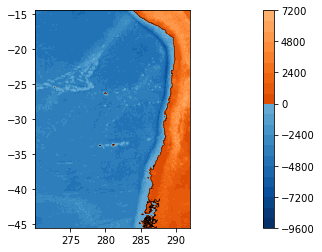

In [9]:
#Cargar datos
data=Dataset(r"C:\Users\ASUS\Desktop\Memoria\Jupyter\bat_l0_gebco_30sa_chilecont_v2.grd")
#Graficar
mapeo(data)

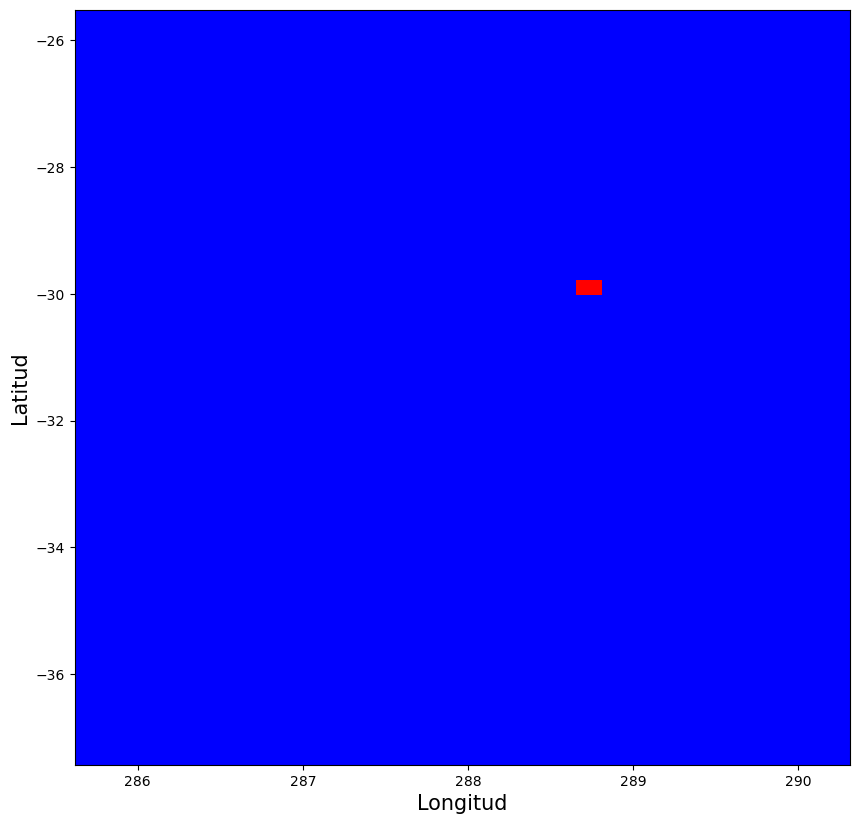

In [10]:
#Cargar datos
data1=Dataset(r"C:\Users\ASUS\Desktop\Memoria\Tarea1\test75\L0_v3.grd")
data2=Dataset(r"C:\Users\ASUS\Desktop\Memoria\Tarea1\test75\bat_l4_serecoq_conf1.grd")
#Llamar función
grilla(data1,data2)